# Forecasting General Eletric Stock Price with Random Forest Regressor

## Libraries Import
##### Importing all libraries we will use during the project

In [38]:
import pandas as pd
import yfinance as yf
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

## Data Import
##### Importing dataset containing info about General Eletric Company Stock: including price, volumes...

##### Data is downloaded from Yahoo Finance Library and contains information about each trading day from 2010 


In [3]:
ticker = "GE"
stock = yf.Ticker(ticker)
price_history = stock.history(period="1d", start='2009-12-30')

##### Now we have downloaded our data, so let's give a look at the database and find out how it's organized

In [4]:
price_history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3383 entries, 2009-12-30 00:00:00-05:00 to 2023-06-08 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3383 non-null   float64
 1   High          3383 non-null   float64
 2   Low           3383 non-null   float64
 3   Close         3383 non-null   float64
 4   Volume        3383 non-null   int64  
 5   Dividends     3383 non-null   float64
 6   Stock Splits  3383 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 340.5 KB


In [5]:
price_history.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-12-30 00:00:00-05:00,67.473178,67.781883,67.296779,67.693680,7485540,0.0,0.0
2009-12-31 00:00:00-05:00,67.340875,67.649574,66.723473,66.723473,7415847,0.0,0.0
2010-01-04 00:00:00-05:00,67.120340,68.972547,66.811642,68.134644,11170816,0.0,0.0
2010-01-05 00:00:00-05:00,68.178744,69.104844,68.134642,68.487442,10749611,0.0,0.0
2010-01-06 00:00:00-05:00,68.487443,68.884344,68.090542,68.134644,9236570,0.0,0.0
2010-01-07 00:00:00-05:00,68.266942,72.676954,68.046441,71.662651,30886702,0.0,0.0
2010-01-08 00:00:00-05:00,71.927248,73.603055,71.750848,73.206154,19169701,0.0,0.0
2010-01-11 00:00:00-05:00,74.220455,74.440956,72.941549,73.911751,12768754,0.0,0.0
2010-01-12 00:00:00-05:00,73.117953,74.264560,73.073857,73.955856,10761635,0.0,0.0


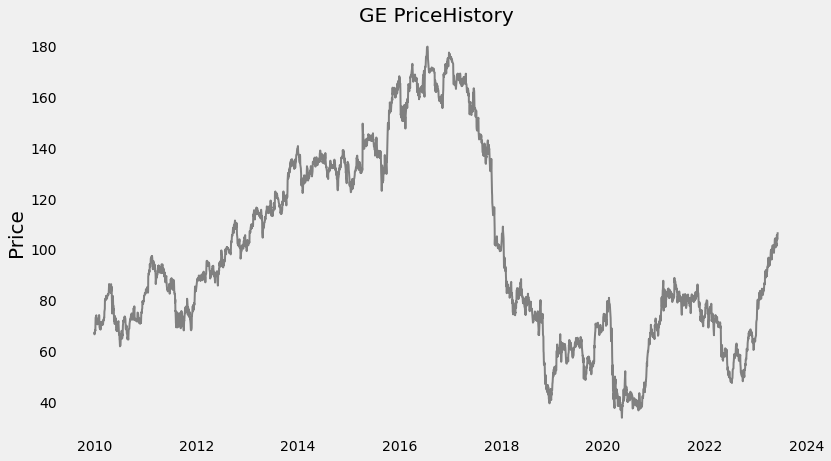

In [7]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [12, 7]
plt.title(ticker + " PriceHistory", size=20)
plt.plot(price_history.index,price_history['Close'], color="Grey", linewidth=2)
plt.grid(alpha=0)
plt.ylabel("Price", size = 20)
plt.show()

##### A useful metric to predict the General Eletric stock price could be the difference between open and close.

##### So let's calculate it and add it to the dataframe

In [8]:
price_history['Daily Move'] = abs(price_history['Open'] - price_history['Close'])

##### Now let's analyze correlation between volumes and daily move

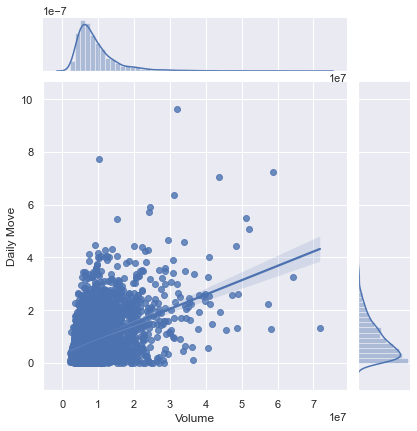

In [86]:
g = sns.JointGrid(x="Volume", y="Daily Move", data=price_history)
sns.color_palette("flare")
g = g.plot(sns.regplot, sns.distplot)
sns.set(rc={'figure.figsize':(11.7,8.27)})

#### Now it's time to analyze distribution of daily returns for the stock price

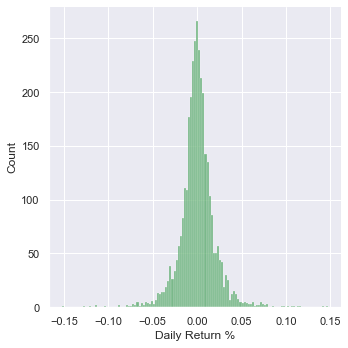

In [88]:
price_history['Daily Return %'] = pd.Series(price_history['Close']).pct_change()
sns.displot(price_history['Daily Return %'], color='g')

#### We can now proceed but first let's take a look at the dataframe

In [11]:
price_history.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Move,Daily Return %
Date,,,,,,,,,
2009-12-30 00:00:00-05:00,67.473178,67.781883,67.296779,67.693680,7485540,0.0,0.0,0.220501,NaN
2009-12-31 00:00:00-05:00,67.340875,67.649574,66.723473,66.723473,7415847,0.0,0.0,0.617403,-0.014332
2010-01-04 00:00:00-05:00,67.120340,68.972547,66.811642,68.134644,11170816,0.0,0.0,1.014303,0.021150
2010-01-05 00:00:00-05:00,68.178744,69.104844,68.134642,68.487442,10749611,0.0,0.0,0.308698,0.005178
2010-01-06 00:00:00-05:00,68.487443,68.884344,68.090542,68.134644,9236570,0.0,0.0,0.352800,-0.005151
2010-01-07 00:00:00-05:00,68.266942,72.676954,68.046441,71.662651,30886702,0.0,0.0,3.395709,0.051780
2010-01-08 00:00:00-05:00,71.927248,73.603055,71.750848,73.206154,19169701,0.0,0.0,1.278906,0.021538
2010-01-11 00:00:00-05:00,74.220455,74.440956,72.941549,73.911751,12768754,0.0,0.0,0.308704,0.009638
2010-01-12 00:00:00-05:00,73.117953,74.264560,73.073857,73.955856,10761635,0.0,0.0,0.837903,0.000597


#### First row of df is NaN so it will be dropped

In [13]:
price_history.drop(price_history.index[0], axis=0, inplace=True)

## Model Elaborating

#### Starting to build the testing environment for the model.

#### Importing Sklearn Libraries, we will use the Random Forest Regressor to make our predictions.
#### You can discover more about Random Forest Regressor [here](https://en.wikipedia.org/wiki/Random_forest).

In [14]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#### We are going to create a new column of the dataframe which contains the shifted value of the close column.
#### This value represents the next day close, the value we want to predict.

In [15]:
price_history['Shifted_Close'] = price_history['Close'].shift(-1)

You can see how it works here in a small portion of the dataset.

In [16]:
price_history[['Close', 'Shifted_Close']].head(10)

,Close,Shifted_Close
Date,,
2009-12-31 00:00:00-05:00,66.723473,68.134644
2010-01-04 00:00:00-05:00,68.134644,68.487442
2010-01-05 00:00:00-05:00,68.487442,68.134644
2010-01-06 00:00:00-05:00,68.134644,71.662651
2010-01-07 00:00:00-05:00,71.662651,73.206154
2010-01-08 00:00:00-05:00,73.206154,73.911751
2010-01-11 00:00:00-05:00,73.911751,73.955856
2010-01-12 00:00:00-05:00,73.955856,74.220467
2010-01-13 00:00:00-05:00,74.220467,73.647156


Now it's necessary to remove the last row of the dataframe, which will be of course NaN in the shifted column

In [17]:
price_history.drop(price_history.tail(1).index, axis=0, inplace=True)

#### Now we will divide the dataset in two parts: X (input features) and Y (target variable). 
X represents the data used to make predictions, while Y represents the desired outcome or variable to be predicted. 

This separation allows the model to learn the relationship between the input features and the target variable, enabling it to make accurate predictions based on the learned patterns.

In [18]:
x = price_history.reset_index(inplace=False)
y = price_history['Shifted_Close'].reset_index()

Removing the next day close (Y) from the X data, otherwise our prediction would be obviously always correct.

In [19]:
x.drop(['Date', 'Shifted_Close'], axis=1, inplace=True)

In [20]:
y.drop('Date', axis=1,inplace=True)

In [21]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3381 entries, 0 to 3380
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Shifted_Close  3381 non-null   float64
dtypes: float64(1)
memory usage: 26.5 KB


Train_Test_Split is a function of Sklearn which will divide data into a smaller portion. 

We are using test_size = 0.35 so it means that our "small" portion will correspond to 35% of our original dataframe

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)

## Since we have now our test envoirment ready, it's time to fit the model

In [23]:
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200)

## Generating predictions

In [24]:
predictions = rfr.predict(x_test)

#### Now we are importing the module needed to valuate the model performance

In [25]:
from sklearn import metrics

Since GE is not very volatile, I will use MAE (Median Absolute Error) as the evaluation metric for the model.

MAE is suitable for measuring the accuracy of variables like stock prices.

In [26]:
print("Model Evaluation:")

print('MAE:', round(metrics.mean_absolute_error(y_test, predictions),4))

Model Evaluation:
MAE: 1.247


#### Our result is not bad if compared to the actual Standard Deviation of the stock:

In [81]:
price_history.index = pd.to_datetime(price_history.index)
price_history['Year'], std_array = price_history.index.year, []

for year in price_history['Year'].unique():
    std_array.append(pd.Series(price_history[price_history['Year'] == year]['Close']).std())

standard_deviation = pd.Series(std_array).mean()

print('Mean of annual Standard Deviation while 2010-2023 is:',round(standard_deviation,2))

Mean of annual Standard Deviation while 2010-2023 is: 9.41


### This is my first project operating a supervised learning model in real scenarios, it's very amateur and I will certainly have the opportunity to try again, in the future, with far more experience and knowledge. 